In [ ]:
!git clone https://github.com/Khushi804/Vitiligo-Identification-CNN
%cd Vitiligo-Identification-CNN
!pip install gradio

Cloning into 'Vitiligo-Identification-CNN'...
remote: Enumerating objects: 823, done.
remote: Counting objects: 100% (425/425), done.
remote: Compressing objects: 100% (422/422), done.
remote: Total 823 (delta 5), reused 418 (delta 3), pack-reused 398 (from 1)
Receiving objects: 100% (823/823), 13.28 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/Vitiligo-Identification-CNN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Import the necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop

# Data Generator
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

# Train and Test Data
train_dataset = train.flow_from_directory(r'/content/Vitiligo-Identification-CNN/Vitiligo-Identification-CNN/Data/Train',target_size=(150,150), class_mode='binary', batch_size=64) # Add path to your training data set

# Read the validation dataset
validation_dataset = test.flow_from_directory(r'/content/Vitiligo-Identification-CNN/Vitiligo-Identification-CNN/Data/Test',target_size=(150,150), class_mode='binary', batch_size=64) # Add path to your testing data set

# Class
print(train_dataset.classes)

Found 255 images belonging to 2 classes.
Found 107 images belonging to 2 classes.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

model.compile(loss="binary_crossentropy",optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

history = model.fit(train_dataset,epochs=20,validation_data = validation_dataset)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4894 - loss: 0.7554 - val_accuracy: 0.6262 - val_loss: 0.7065
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6390 - loss: 0.6859 - val_accuracy: 0.6262 - val_loss: 0.6624
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6291 - loss: 0.6587 - val_accuracy: 0.6262 - val_loss: 0.6431
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6564 - loss: 0.6179 - val_accuracy: 0.6262 - val_loss: 0.6503
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6427 - loss: 0.6198 - val_accuracy: 0.6262 - val_loss: 0.6491
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6407 - loss: 0.6176 - val_accuracy: 0.6262 - val_loss: 0.5770
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6428 - loss: 0.5577 - val_accuracy: 0.6262 - val_loss: 0.5644
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6573 - loss: 0.5341 - val_accuracy: 0.7944 - val_loss: 0.6190
Epoch 9/20
4/4 ━━━━━━━━━

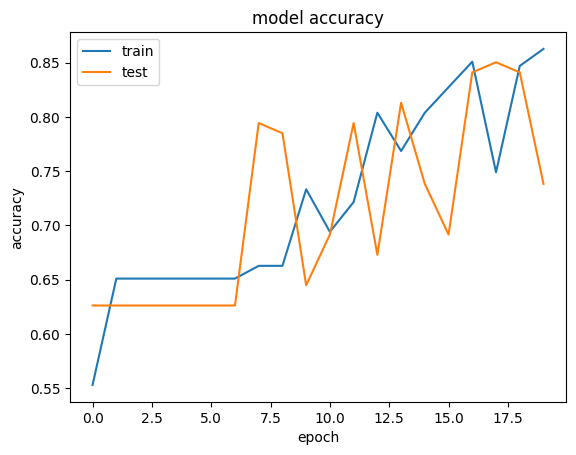

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
f"Confidence: {history.history['accuracy'][-1]}"

'Confidence: 0.8627451062202454'

In [ ]:
#@title Model InceptionV3
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Load the InceptionV3 model with pretrained weights from ImageNet
# Set include_top=False to exclude the fully connected layers, as we will add custom layers for our task
base_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

# Freeze the base model so its weights are not updated during training
base_model.trainable = False

# Add custom layers on top of the InceptionV3 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(128, activation='relu')(x)  # Dense layer with 128 units
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
output = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification (vitiligo or not)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary crossentropy loss and RMSprop optimizer
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

# Summary of the model architecture
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 74, 74, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 22,065,185 (84.17 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.4727 - loss: 1.3763 - val_accuracy: 0.6729 - val_loss: 0.6595
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.6370 - loss: 0.8234 - val_accuracy: 0.6636 - val_loss: 0.5525
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6527 - loss: 0.7380 - val_accuracy: 0.7009 - val_loss: 0.5177
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.6862 - loss: 0.6565 - val_accuracy: 0.7570 - val_loss: 0.5212
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.7003 - loss: 0.5635 - val_accuracy: 0.7477 - val_loss: 0.4804
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.7139 - loss: 0.5146 - val_accuracy: 0.7757 - val_loss: 0.4634
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.7731 - loss: 0.5099 - val_accuracy: 0.7757 - val_loss: 0.4402
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.7564 - loss: 0.4667 - val_accuracy: 0.7944 - val_loss: 0.4265
Epoch 9/

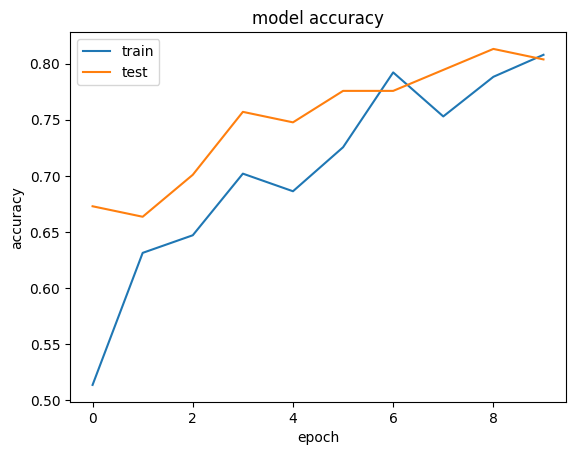

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
f"Confidence: {history.history['accuracy'][-1]}"

'Confidence: 0.8078431487083435'

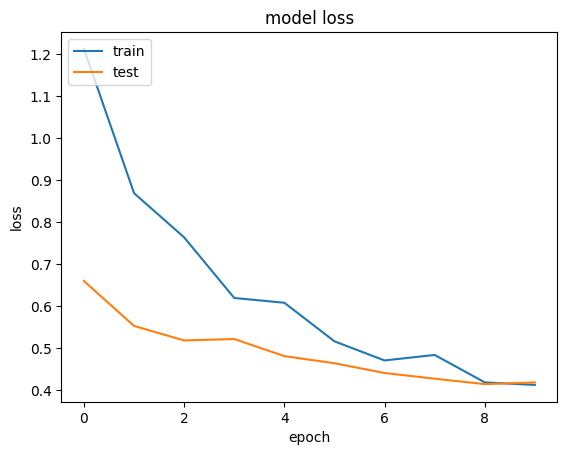

In [ ]:
# Loss value plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load pre-trained Inception v3 model (replace 'imagenet' with your custom weights if available)
model = InceptionV3(weights='imagenet', include_top=True)  # or load your custom trained model

# Function to preprocess the image before prediction
def prepare_image(img_path, target_size=(299, 299)):  # Inception v3 expects 299x299 input
    img = image.load_img(img_path, target_size=target_size)  # Load the image
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch
    img_array = preprocess_input(img_array)  # Preprocess the image as per Inception's requirements
    return img_array

# Predict whether an image represents vitiligo
def predict_vitiligo(img_path):
    processed_image = prepare_image(img_path)
    prediction = model.predict(processed_image)

    # If you have custom output for binary classification, adjust the threshold accordingly
    if prediction[0][0] > 0.5:  # Assuming binary classification (for vitiligo vs normal)
        print(f"The model predicts that the image represents vitiligo (Confidence: {prediction[0][0]:.2f})")
    else:
        print(f"The model predicts that the image does not represent vitiligo (Confidence: {1 - prediction[0][0]:.2f})")

# Example usage
predict_vitiligo('/content/Vitiligo-Identification-CNN/Vitiligo-Identification-CNN/Data/Test/Normal/image_40.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The model predicts that the image does not represent vitiligo (Confidence: 1.00)


In [ ]:
#@title RasNet

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Load the pre-trained ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base_model layers to prevent training them initially
base_model.trainable = False

# Add custom layers on top of the ResNet50 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add global average pooling layer to reduce dimensionality
x = Dense(128, activation='relu')(x)  # Add a dense layer with 128 units
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
output = Dense(1, activation='sigmoid')(x)  # Binary classification layer (0: No Vitiligo, 1: Vitiligo)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary crossentropy loss, an RMSprop optimizer, and accuracy metrics
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

# Model summary
model.summary()

# Train the model on the dataset
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 75, 75, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 75, 75, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 38, 38, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 38, 38, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.5598 - loss: 0.7004 - val_accuracy: 0.6262 - val_loss: 0.6605
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 9s/step - accuracy: 0.6053 - loss: 0.6720 - val_accuracy: 0.6262 - val_loss: 0.6613
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 8s/step - accuracy: 0.6105 - loss: 0.7252 - val_accuracy: 0.6262 - val_loss: 0.6614
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 8s/step - accuracy: 0.6097 - loss: 0.7089 - val_accuracy: 0.6262 - val_loss: 0.6600
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.6882 - loss: 0.6136 - val_accuracy: 0.6262 - val_loss: 0.6583
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.6400 - loss: 0.6507 - val_accuracy: 0.6262 - val_loss: 0.6572
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - accuracy: 0.6275 - loss: 0.6789 - val_accuracy: 0.6262 - val_loss: 0.6564
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 8s/step - accuracy: 0.5811 - loss: 0.6885 - val_accuracy: 0.6262 - val_loss: 0.6561
Epoch 9/

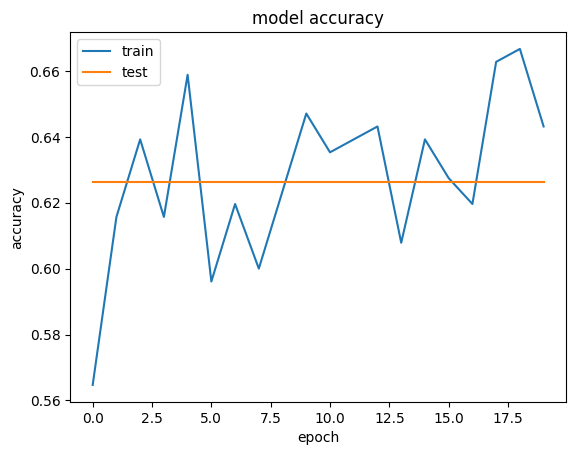

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
f"Confidence: {history.history['accuracy'][-1]}"

'Confidence: 0.6431372761726379'

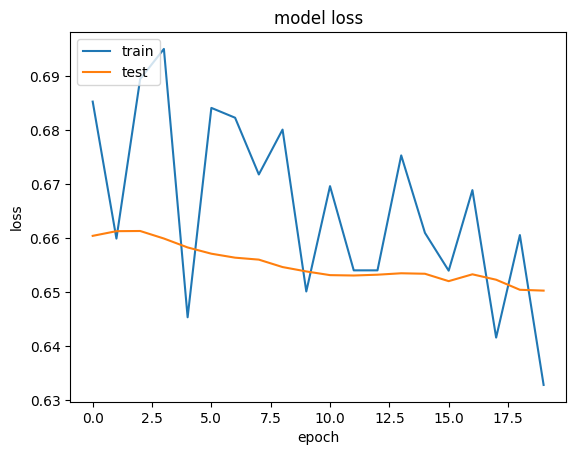

In [ ]:
# Loss value plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
f"Confidence: {history.history['accuracy'][-1]}"

'Confidence: 0.6431372761726379'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load pre-trained ResNet50 model (replace 'imagenet' with your custom weights if available)
model = ResNet50(weights='imagenet', include_top=True)  # or load your custom trained model

# Function to preprocess the image before prediction
def prepare_image(img_path, target_size=(224, 224)):  # ResNet50 expects 224x224 input
    img = image.load_img(img_path, target_size=target_size)  # Load the image
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch
    img_array = preprocess_input(img_array)  # Preprocess the image as per ResNet50's requirements
    return img_array

# Predict whether an image represents vitiligo
def predict_vitiligo(img_path):
    processed_image = prepare_image(img_path)
    prediction = model.predict(processed_image)

    # If you have custom output for binary classification, adjust the threshold accordingly
    if prediction[0][0] > 0.5:  # Assuming binary classification (for vitiligo vs normal)
        print(f"The model predicts that the image represents vitiligo (Confidence: {prediction[0][0]:.2f})")
    else:
        print(f"The model predicts that the image does not represent vitiligo (Confidence: {1 - prediction[0][0]:.2f})")

# Example usage
predict_vitiligo('/content/Vitiligo-Identification-CNN/Vitiligo-Identification-CNN/Data/Test/Normal/image_39.jpg')


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The model predicts that the image does not represent vitiligo (Confidence: 1.00)


## Hybrid


In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3, ResNet50
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score

# Load pre-trained models (ImageNet weights for demo purposes)
inception_model = InceptionV3(weights='imagenet', include_top=True)
resnet_model = ResNet50(weights='imagenet', include_top=True)

# Function to preprocess the image for both models
def prepare_image(img_path, target_size_inception=(299, 299), target_size_resnet=(224, 224)):
    # Preprocess image for InceptionV3
    img_inception = image.load_img(img_path, target_size=target_size_inception)
    img_array_inception = image.img_to_array(img_inception)
    img_array_inception = np.expand_dims(img_array_inception, axis=0)
    img_array_inception = preprocess_inception(img_array_inception)

    # Preprocess image for ResNet50
    img_resnet = image.load_img(img_path, target_size=target_size_resnet)
    img_array_resnet = image.img_to_array(img_resnet)
    img_array_resnet = np.expand_dims(img_array_resnet, axis=0)
    img_array_resnet = preprocess_resnet(img_array_resnet)

    return img_array_inception, img_array_resnet

# Function to make predictions using both models and average the results
def ensemble_predict(img_path):
    img_inception, img_resnet = prepare_image(img_path)

    # Get predictions from both models
    prediction_inception = inception_model.predict(img_inception)
    prediction_resnet = resnet_model.predict(img_resnet)

    # Average predictions
    ensemble_prediction = (prediction_inception + prediction_resnet) / 2.0

    return ensemble_prediction

# Function to evaluate the ensemble model and calculate accuracy
def evaluate_ensemble_model(test_images, test_labels):
    ensemble_preds = []

    # Loop through test images and make predictions
    for img_path in test_images:
        ensemble_prediction = ensemble_predict(img_path)
        predicted_label = np.argmax(ensemble_prediction, axis=1)  # Assuming multi-class classification
        ensemble_preds.append(predicted_label[0])

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, ensemble_preds)
    print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")

# Example usage (replace with actual paths to your test images and corresponding labels)
test_images = ['', '/path/to/test/image2.jpg']  # List of test image paths
test_labels = [0, 1]  # True labels of test images (binary or multi-class)

evaluate_ensemble_model(test_images, test_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Ensemble Model Accuracy: 0.00%


In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3, ResNet50
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from sklearn.metrics import accuracy_score

# Load pre-trained models (ImageNet weights for demo purposes)
inception_model = InceptionV3(weights='imagenet', include_top=True)
resnet_model = ResNet50(weights='imagenet', include_top=True)

# Function to preprocess the dataset for both models
def preprocess_dataset(X):
    # Preprocess for InceptionV3 (resize to 299x299)
    X_inception = np.array([preprocess_inception(np.resize(img, (299, 299, 3))) for img in X])

    # Preprocess for ResNet50 (resize to 224x224)
    X_resnet = np.array([preprocess_resnet(np.resize(img, (224, 224, 3))) for img in X])

    return X_inception, X_resnet

# Function to calculate the ensemble prediction
def ensemble_predictions(X_inception, X_resnet):
    # Get predictions from both models
    preds_inception = inception_model.predict(X_inception)
    preds_resnet = resnet_model.predict(X_resnet)

    # Average predictions from both models
    ensemble_preds = (preds_inception + preds_resnet) / 2.0

    # Convert to predicted labels
    predicted_labels = np.argmax(ensemble_preds, axis=1)
    return predicted_labels

# Function to calculate the accuracy of the ensemble model
def calculate_accuracy(X_test, y_test):
    # Preprocess the dataset for both models
    X_inception, X_resnet = preprocess_dataset(X_test)

    # Get ensemble predictions
    ensemble_preds = ensemble_predictions(X_inception, X_resnet)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, ensemble_preds)
    print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")

# Example usage (replace with actual test dataset)
# Assuming X_test is the test dataset (numpy array of images) and y_test is the corresponding true labels
# X_test should be of shape (num_samples, height, width, 3), and y_test should be a list of true labels.

# Example test dataset (replace with actual data)
X_test = np.random.rand(10, 224, 224, 3)  # 10 random images of size 224x224x3
y_test = np.random.randint(0, 1000, 10)   # Random labels for ImageNet classes (replace with your actual labels)

# Calculate accuracy
calculate_accuracy(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Ensemble Model Accuracy: 0.00%


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load your trained model (assumed it's already trained with InceptionV3 or any other architecture)
# If the model is saved in a file, load it here
# model = tf.keras.models.load_model('path_to_your_saved_model.h5')

# For demonstration, I'm assuming we have a model trained and loaded into the variable `model`

def predict_vitiligo(img):
    # Resize the image to 150x150 pixels (as expected by the model)
    img = img.resize((150, 150))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Rescale the image (as done during training)
    img_array = img_array / 255.0

    # Add an extra batch dimension, since the model expects a batch of images
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction using the model
    prediction = model.predict(img_array)

    # Interpret the result
    confidence = prediction[0][0] * 100  # Convert to percentage
    if confidence > 50:
        return f"The image indicates Vitiligo with a confidence of {confidence:.2f}%"
    else:
        return f"The image does NOT indicate Vitiligo with a confidence of {(100 - confidence):.2f}%"

# Gradio interface: Allow user to upload an image and display the result
# The `inputs` parameter is an image input, and `outputs` will display the prediction text

# Define the Gradio interface
gr_interface = gr.Interface(
    fn=predict_vitiligo,  # Function to be called for prediction
    inputs=gr.Image(type="pil"),  # Image input (type="pil" to use PIL images)
    outputs="text",  # Text output displaying the result
    title="Vitiligo Detection",  # Title of the interface
    description="Upload an image, and the model will predict whether vitiligo is present with a confidence score."
)

# Launch the interface
gr_interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7fa8ab10bd6b50e0f1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
